In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix

In [119]:
PATH_DATABASES = "../Database/"
NAME_DATABASE = "metastase"
DATABASE_EXTENSION = ".csv"

In [120]:
def load_data (path_database = PATH_DATABASES + NAME_DATABASE + DATABASE_EXTENSION):
    return pd.read_csv(path_database, encoding='latin-1', delimiter=',')

In [121]:
def split_features_target (db):
    return db.drop(['METASTASE'], axis = 1), db['METASTASE']

In [122]:
def encode_data (db, cols):
    le = LabelEncoder()

    for col in cols:
        db.loc[:,col].value = le.fit_transform(db.loc[:,col])
    return db

In [123]:
def dummy_data (db, cols):
    return pd.get_dummies(db, columns = cols)

In [124]:
def remove_missing_values (db):
    db = db.drop(db.columns[[10,11,12,13,14]], axis = 1)
    return db.dropna()
    


In [125]:
database = load_data()
database = remove_missing_values(database)
database

,TEMPOACOMP,METASTASE,GENERO,GRUPOIDADE,LOCALMMPR,TIPOHE,CATBRESLOW,CATCLARK,ULCERHE,MITOSESHE
2,3.97,1,2,2.0,2.0,1.0,3.0,3.0,2.0,2.0
5,3.30,1,1,3.0,3.0,4.0,3.0,3.0,2.0,2.0
8,182.70,2,1,1.0,1.0,3.0,2.0,3.0,2.0,2.0
52,81.13,2,1,1.0,1.0,1.0,1.0,3.0,1.0,2.0
61,33.90,2,2,2.0,2.0,3.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
508,4.93,2,1,2.0,1.0,1.0,1.0,1.0,1.0,1.0
510,14.00,2,2,2.0,1.0,1.0,1.0,2.0,1.0,2.0
511,7.90,2,2,3.0,1.0,1.0,2.0,2.0,1.0,2.0
512,4.13,2,2,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [126]:
features, target = split_features_target(database)
features

,TEMPOACOMP,GENERO,GRUPOIDADE,LOCALMMPR,TIPOHE,CATBRESLOW,CATCLARK,ULCERHE,MITOSESHE
2,3.97,2,2.0,2.0,1.0,3.0,3.0,2.0,2.0
5,3.30,1,3.0,3.0,4.0,3.0,3.0,2.0,2.0
8,182.70,1,1.0,1.0,3.0,2.0,3.0,2.0,2.0
52,81.13,1,1.0,1.0,1.0,1.0,3.0,1.0,2.0
61,33.90,2,2.0,2.0,3.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
508,4.93,1,2.0,1.0,1.0,1.0,1.0,1.0,1.0
510,14.00,2,2.0,1.0,1.0,1.0,2.0,1.0,2.0
511,7.90,2,3.0,1.0,1.0,2.0,2.0,1.0,2.0
512,4.13,2,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [127]:
target

2      1
5      1
8      2
52     2
61     2
      ..
508    2
510    2
511    2
512    2
513    2
Name: METASTASE, Length: 215, dtype: int64

**Colunas para dummy e encode**

In [128]:
#colsToEncode = ['bruises', 'gill-spacing','gill-size','stalk-shape', 'veil-type']
#colsToDummy = ['cap-shape','cap-surface','cap-color','odor','gill-attachment', 'gill-color',  'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

**Encoding**

In [129]:
#features = encode_data(features, colsToEncode)
#features = dummy_data(features, colsToDummy)
#features

**Preparando para rodar árvore**

In [130]:
x_prev = features.values
X_train, X_test, y_train, y_test = train_test_split(x_prev, target, test_size=0.2, random_state=0)

In [131]:
modelo = DecisionTreeClassifier(criterion='gini', random_state=10)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [132]:
previsoes = modelo.predict(X_test)
previsoes

array([2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

0.9534883720930233

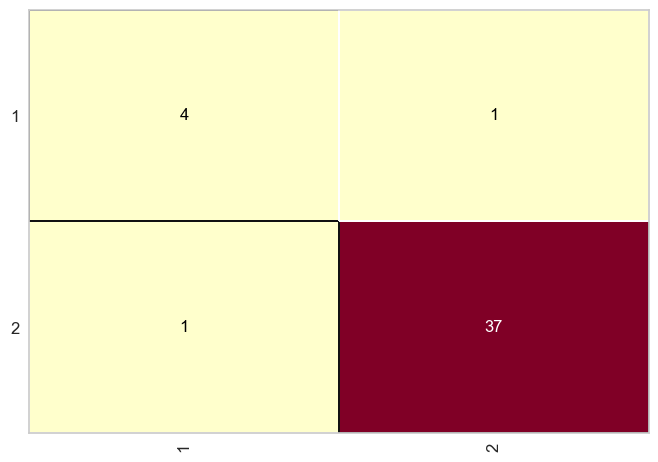

In [133]:
confusion = ConfusionMatrix(modelo)
confusion.fit(X_train, y_train)
confusion.score(X_test, y_test)

In [134]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.97      0.97      0.97        38

    accuracy                           0.95        43
   macro avg       0.89      0.89      0.89        43
weighted avg       0.95      0.95      0.95        43



In [135]:
modelo.classes_

array([1, 2], dtype=int64)

**La arvore**

[Text(0.640625, 0.9, 'CATBRESLOW <= 2.5\ngini = 0.257\nsamples = 172\nvalue = [26, 146]\nclass = NAO'),
 Text(0.40625, 0.7, 'TEMPOACOMP <= 5.715\ngini = 0.174\nsamples = 156\nvalue = [15, 141]\nclass = NAO'),
 Text(0.25, 0.5, 'TIPOHE <= 2.0\ngini = 0.464\nsamples = 30\nvalue = [11, 19]\nclass = NAO'),
 Text(0.125, 0.3, 'CATCLARK <= 2.5\ngini = 0.18\nsamples = 20\nvalue = [2, 18]\nclass = NAO'),
 Text(0.0625, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.3, 'MITOSESHE <= 1.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = SIM'),
 Text(0.3125, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.1, '\n  (...)  \n'),
 Text(0.5625, 0.5, 'CATBRESLOW <= 1.5\ngini = 0.061\nsamples = 126\nvalue = [4, 122]\nclass = NAO'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 84\nvalue = [0, 84]\nclass = NAO'),
 Text(0.625, 0.3, 'TEMPOACOMP <= 27.965\ngini = 0.172\nsamples = 42\nvalue = [4, 38]\nclass = NAO'),
 Text(0.5625, 0.1, '\n  (...)  \n'),
 Text(0.6875, 0.1, '\n  (...)  \n'),
 Text(0.

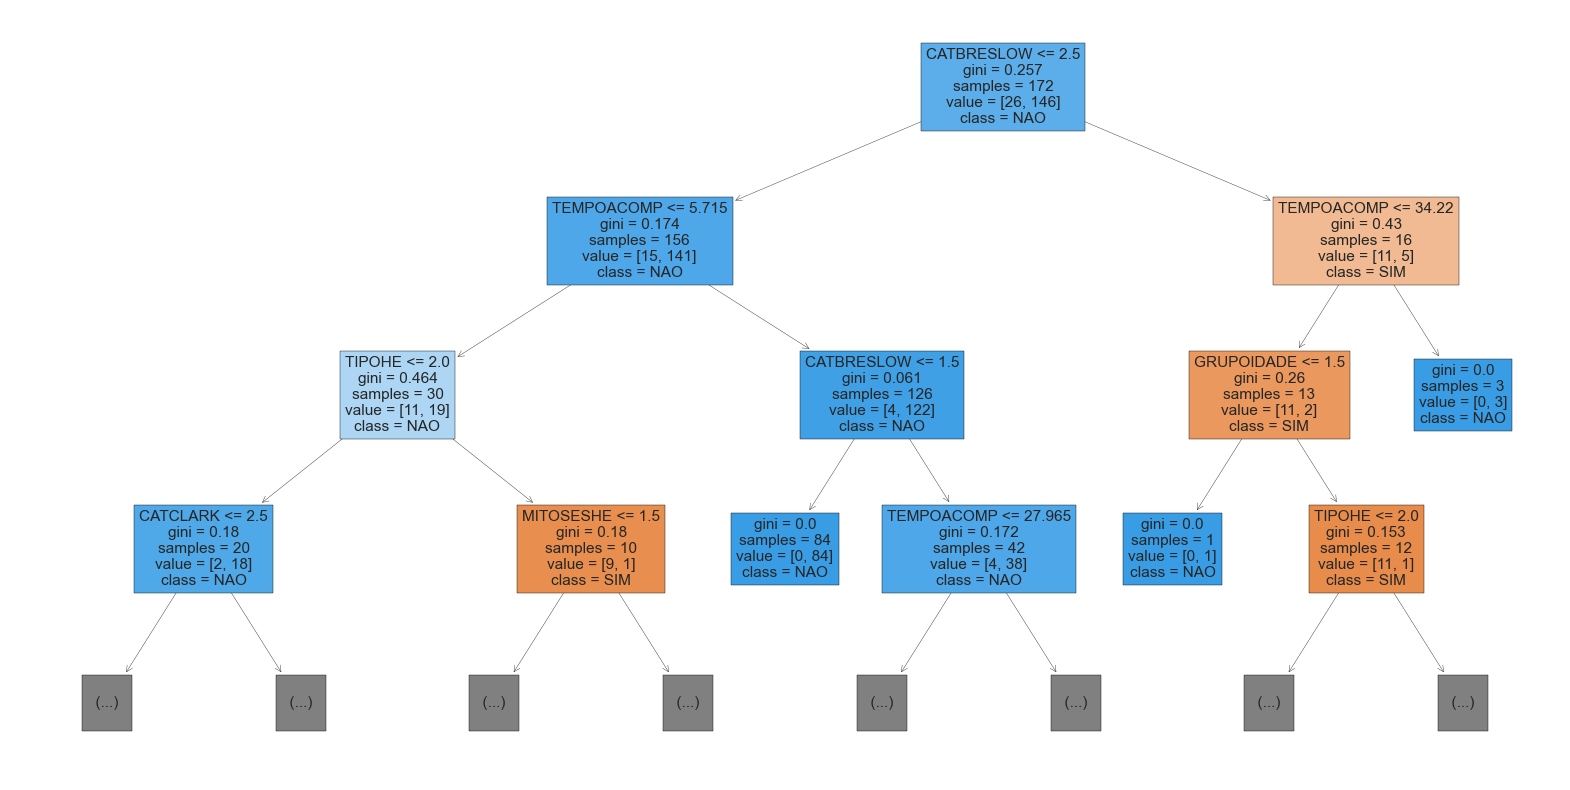

In [136]:
plt.subplots(figsize=(20, 10))
tree.plot_tree(modelo, filled=True, class_names=['SIM', 'NAO'], feature_names=features.columns, max_depth=3)